In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina' 

# Add this to python2 code to make life easier
from __future__ import absolute_import, division, print_function

from itertools import combinations
from pivottablejs import pivot_ui
import string

from IPython.display import IFrame, HTML, YouTubeVideo, Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns

sns.set();
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("darkgrid")
sns.set_context("poster", font_scale=1.3)

/Users/AndyMC/miniconda2/envs/tf/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
HTML('<iframe src=https://en.wikipedia.org/wiki/Zika_fever width=100% height=300></iframe>')

In [3]:
YouTubeVideo("v=JUlGN5XJ5dc")

In [4]:
df = pd.read_csv("../cdc_zika.csv")

/Users/AndyMC/miniconda2/envs/tf/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
report_date,2016-03-19,2016-03-19,2016-03-19,2016-03-19,2016-03-19,2016-03-19,2016-03-19,2016-03-19,2016-03-19,2016-03-19
location,Argentina-Buenos_Aires,Argentina-Buenos_Aires,Argentina-Buenos_Aires,Argentina-Buenos_Aires,Argentina-Buenos_Aires,Argentina-Buenos_Aires,Argentina-CABA,Argentina-CABA,Argentina-CABA,Argentina-CABA
location_type,province,province,province,province,province,province,province,province,province,province
data_field,cumulative_confirmed_local_cases,cumulative_probable_local_cases,cumulative_confirmed_imported_cases,cumulative_probable_imported_cases,cumulative_cases_under_study,cumulative_cases_discarded,cumulative_confirmed_local_cases,cumulative_probable_local_cases,cumulative_confirmed_imported_cases,cumulative_probable_imported_cases
data_field_code,AR0001,AR0002,AR0003,AR0004,AR0005,AR0006,AR0001,AR0002,AR0003,AR0004
time_period,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_period_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
value,0,0,2,1,127,0,0,0,9,0
unit,cases,cases,cases,cases,cases,cases,cases,cases,cases,cases


In [6]:
ec = df[df['location'].str.contains("Ecuador")==True]

In [7]:
ec.head(5)

,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
98910,2016-03-30,Ecuador,country,total_zika_suspected_cumulative,EC0001,NaN,NaN,76,cases
98911,2016-03-30,Ecuador-Sucumbios,province,total_zika_suspected_cumulative,EC0001,NaN,NaN,1,cases
98912,2016-03-30,Ecuador-Santo_Domingo_de_los_Tsachilas,province,total_zika_suspected_cumulative,EC0001,NaN,NaN,1,cases
98913,2016-03-30,Ecuador-Santa_Elena,province,total_zika_suspected_cumulative,EC0001,NaN,NaN,8,cases
98914,2016-03-30,Ecuador-Pichincha,province,total_zika_suspected_cumulative,EC0001,NaN,NaN,19,cases


In [8]:
# eliminar las columnas en los que todos los valores sean NaN
ec = ec.dropna(axis=1,how='all')

In [9]:
# eliminar la columna data_field_code porque es informacion sin valor
try:
    ec = ec.drop('data_field_code', 1)
except (KeyError, ValueError):
    print('not field found')

In [10]:
# # eliminar la columna data_field_code porque es informacion sin valor
try:
    ec = ec.drop('unit', 1)
except (KeyError, ValueError):
    print('not field found')    

In [11]:
ec.head(5).T

,98910,98911,98912,98913,98914
report_date,2016-03-30,2016-03-30,2016-03-30,2016-03-30,2016-03-30
location,Ecuador,Ecuador-Sucumbios,Ecuador-Santo_Domingo_de_los_Tsachilas,Ecuador-Santa_Elena,Ecuador-Pichincha
location_type,country,province,province,province,province
data_field,total_zika_suspected_cumulative,total_zika_suspected_cumulative,total_zika_suspected_cumulative,total_zika_suspected_cumulative,total_zika_suspected_cumulative
value,76,1,1,8,19


In [12]:
ec.rename(columns={'value':'cases'}, inplace=True)

In [13]:
ec = ec.reset_index(drop=True)

In [14]:
ec.head(5).T

,0,1,2,3,4
report_date,2016-03-30,2016-03-30,2016-03-30,2016-03-30,2016-03-30
location,Ecuador,Ecuador-Sucumbios,Ecuador-Santo_Domingo_de_los_Tsachilas,Ecuador-Santa_Elena,Ecuador-Pichincha
location_type,country,province,province,province,province
data_field,total_zika_suspected_cumulative,total_zika_suspected_cumulative,total_zika_suspected_cumulative,total_zika_suspected_cumulative,total_zika_suspected_cumulative
cases,76,1,1,8,19


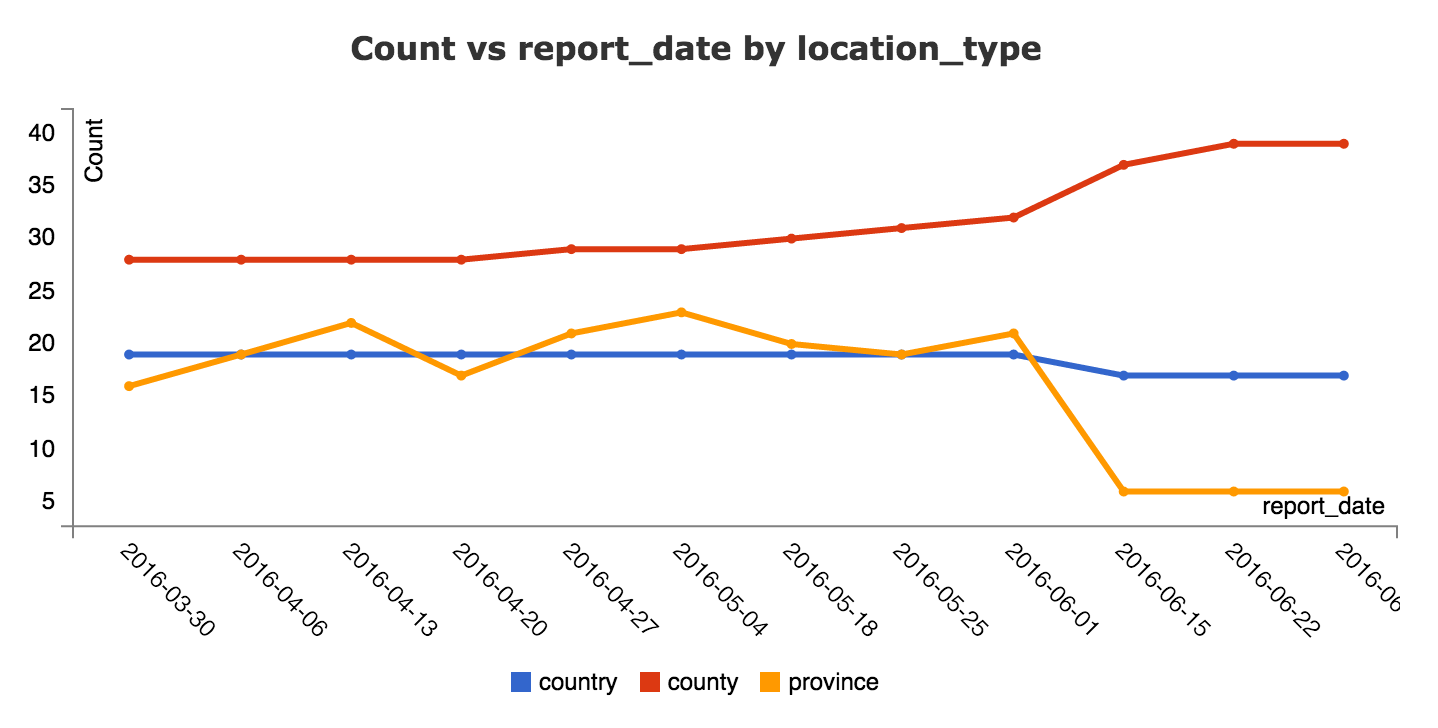

In [15]:
Image('img/report_date_by location_type.png')

In [16]:
# Con esta herramienta se puede hacer graficos de manera muy facil como el de arriba,
# es buena idea porque permite jugar con los datos muy rapido en busca de algo interesante
pivot_ui(ec)

In [17]:
!ls

img                   pivottablejs.html     zika_playground.ipynb
